In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [2]:
url = "https://www.ambitionbox.com/companies-in-hyderabad?page=1"

In [3]:
page = requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})


'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <title>Companies in Hyderabad/Secunderabad - 38.4k companies | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2023 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com"><meta data-n-head="ssr" property="fb:app_id" content="712617688793459"><meta data-n-head="ssr" name="theme-color" content="#ffffff"><meta data-n-head="ssr" name="msapplication-navbutton-color" content="#ffffff"><meta dat
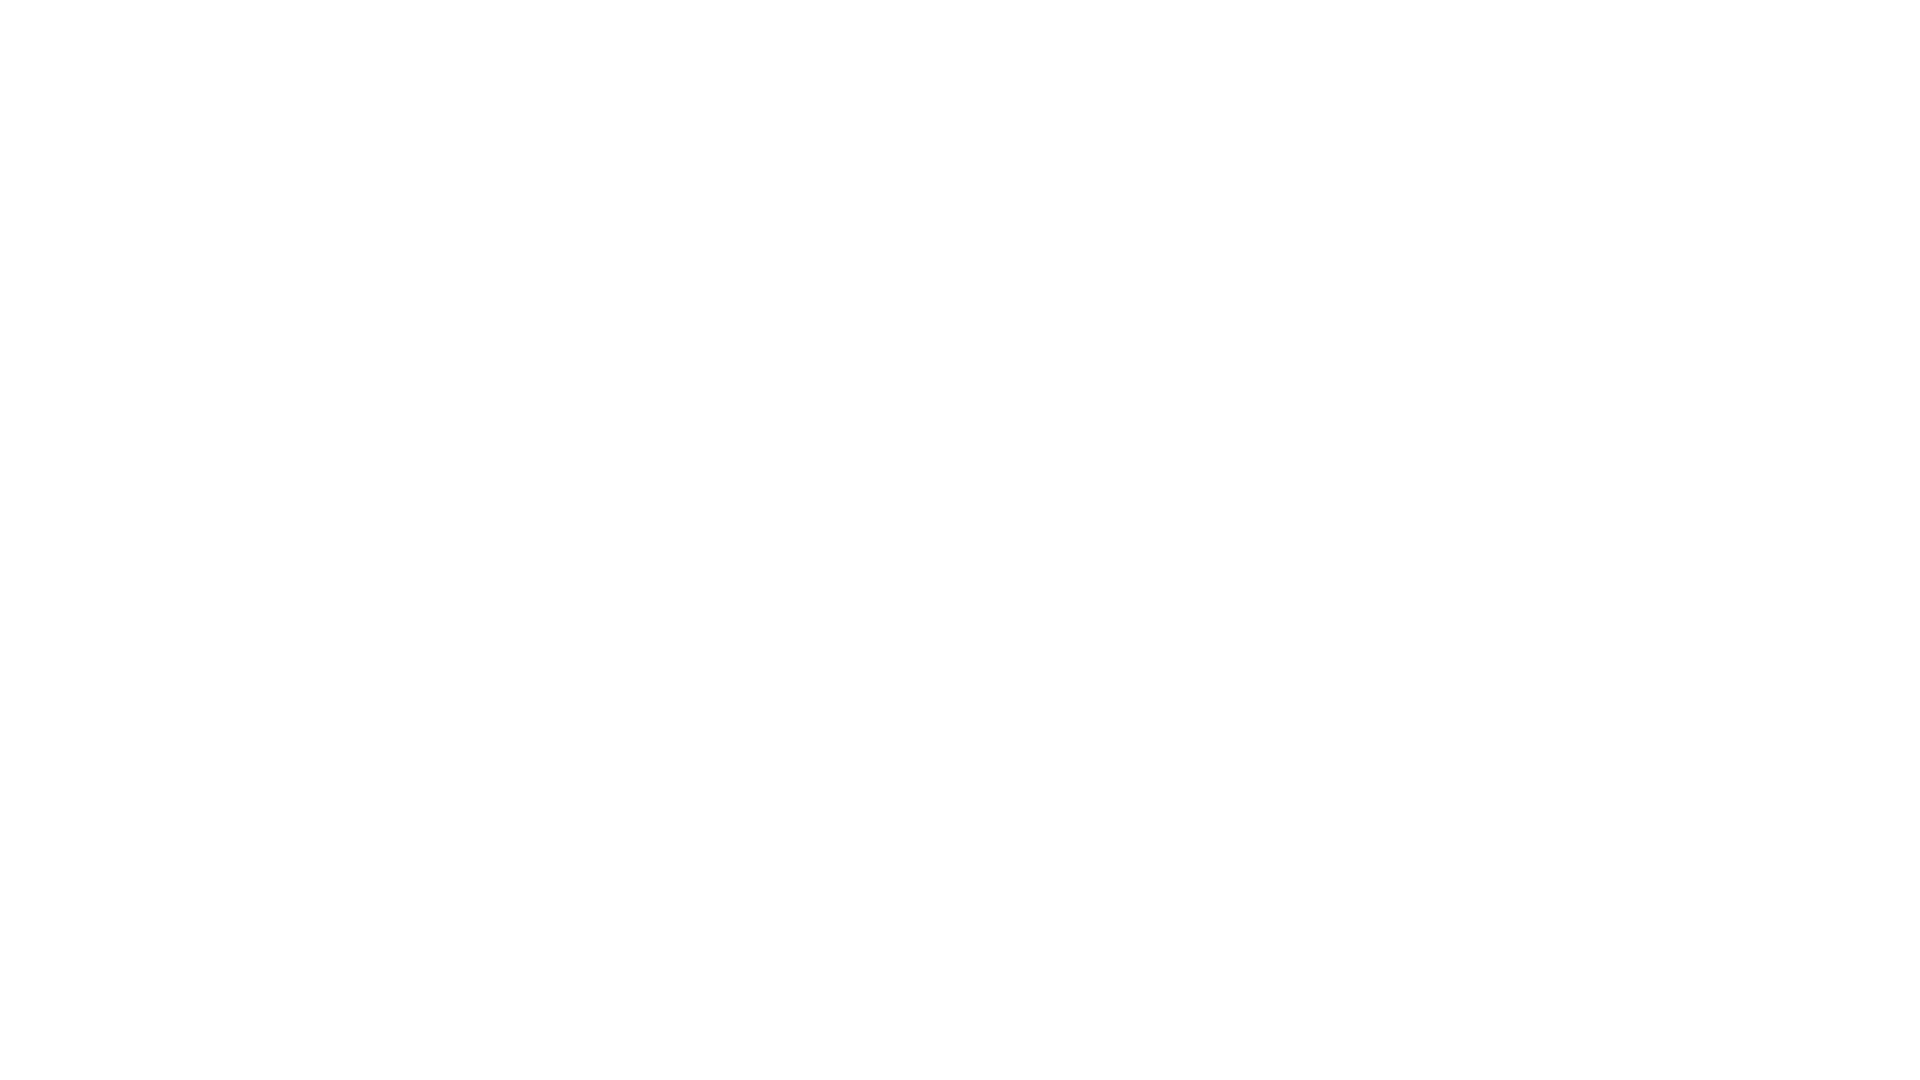

In [4]:
page.text


In [5]:
soup = BeautifulSoup(page.text)

In [7]:
# directly taking the container of the company info
company = soup.find_all('div',class_="company-content-wrapper")

In [9]:
# for the company info container taking company name
for i in company:
    print(i.find('h2'))

<h2 class="company-name bold-title-l" title="TCS">
									TCS
								</h2>
<h2 class="company-name bold-title-l" title="Cognizant">
									Cognizant
								</h2>
<h2 class="company-name bold-title-l" title="Genpact">
									Genpact
								</h2>
<h2 class="company-name bold-title-l" title="Amazon">
									Amazon
								</h2>
<h2 class="company-name bold-title-l" title="Accenture">
									Accenture
								</h2>
<h2 class="company-name bold-title-l" title="Tech Mahindra">
									Tech Mahindra
								</h2>
<h2 class="company-name bold-title-l" title="Wipro">
									Wipro
								</h2>
<h2 class="company-name bold-title-l" title="Infosys">
									Infosys
								</h2>
<h2 class="company-name bold-title-l" title="Deloitte">
									Deloitte
								</h2>
<h2 class="company-name bold-title-l" title="ICICI Bank">
									ICICI Bank
								</h2>
<h2 class="company-name bold-title-l" title="Capgemini">
									Capgemini
								</h2>
<h2 class="company-name bold-title-l

In [10]:
name = []
for i in company:
    name.append(i.find('h2').text.strip())   # to avoid special char using strip()

In [11]:
name

['TCS',
 'Cognizant',
 'Genpact',
 'Amazon',
 'Accenture',
 'Tech Mahindra',
 'Wipro',
 'Infosys',
 'Deloitte',
 'ICICI Bank',
 'Capgemini',
 "Dr. Reddy's",
 'Aurobindo Pharma',
 'Cyient',
 'Wells Fargo Indi...',
 'HSBC',
 'IBM',
 'Automatic Data P...',
 'UnitedHealth',
 'Conneqt Business...',
 'Megha Engineerin...',
 'Optum',
 'ValueLabs',
 'Hetero Drugs',
 'HCLTech',
 'FactSet',
 'Virtusa Consulti...',
 'RMSI',
 'HDB Financial Se...',
 'HDFC Bank']

In [13]:
for i in company:
    print(i.find('p',class_='rating'))

<p class="rating badge-large rating-35"><i class="icon icon-star"></i>
									3.9
								</p>
<p class="rating badge-large rating-4"><i class="icon icon-star"></i>
									4.0
								</p>
<p class="rating badge-large rating-4"><i class="icon icon-star"></i>
									4.0
								</p>
<p class="rating badge-large rating-4"><i class="icon icon-star"></i>
									4.3
								</p>
<p class="rating badge-large rating-4"><i class="icon icon-star"></i>
									4.1
								</p>
<p class="rating badge-large rating-35"><i class="icon icon-star"></i>
									3.7
								</p>
<p class="rating badge-large rating-35"><i class="icon icon-star"></i>
									3.9
								</p>
<p class="rating badge-large rating-35"><i class="icon icon-star"></i>
									3.9
								</p>
<p class="rating badge-large rating-4"><i class="icon icon-star"></i>
									4.1
								</p>
<p class="rating badge-large rating-4"><i class="icon icon-star"></i>
									4.0
								</p>
<p class="rating badge-large rating-

In [14]:
# from the same company info container taking another value rating
rating = []
for i in company:
    rating.append(i.find('p',class_='rating').text.strip())  # following strip to avoid special char

In [15]:
rating

['3.9',
 '4.0',
 '4.0',
 '4.3',
 '4.1',
 '3.7',
 '3.9',
 '3.9',
 '4.1',
 '4.0',
 '3.9',
 '4.2',
 '4.0',
 '3.7',
 '4.2',
 '4.1',
 '4.2',
 '4.2',
 '4.2',
 '3.7',
 '4.1',
 '4.1',
 '3.9',
 '3.9',
 '3.8',
 '4.0',
 '3.8',
 '3.9',
 '4.0',
 '4.0']

In [17]:
reviews = []
for i in company:
    reviews.append(i.find('a',class_='review-count').text.strip())

In [18]:
reviews

['(50k Reviews)',
 '(29.5k Reviews)',
 '(19.3k Reviews)',
 '(18.3k Reviews)',
 '(32.1k Reviews)',
 '(21.4k Reviews)',
 '(28.6k Reviews)',
 '(28.1k Reviews)',
 '(10.2k Reviews)',
 '(33.4k Reviews)',
 '(23.8k Reviews)',
 '(4.8k Reviews)',
 '(3.6k Reviews)',
 '(2.9k Reviews)',
 '(3.5k Reviews)',
 '(5.7k Reviews)',
 '(15.2k Reviews)',
 '(2.1k Reviews)',
 '(4.5k Reviews)',
 '(5.1k Reviews)',
 '(2.7k Reviews)',
 '(2.1k Reviews)',
 '(1.1k Reviews)',
 '(2.5k Reviews)',
 '(18.3k Reviews)',
 '(912 Reviews)',
 '(2.3k Reviews)',
 '(1.1k Reviews)',
 '(13.3k Reviews)',
 '(39k Reviews)']

In [19]:
## here while taking company type , hq , old... we're having same elements type with different index. so by using index to to get required value 
companytype = []
hq = []
old = []
employees= []
for i in company:
    companytype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
    hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
    old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
    try:
        employees.append(i.find_all('p',class_='infoEntity')[3].text.strip())
    except:
        employees.append(np.nan)

In [90]:
# by looking forward to take other value with same elements considerig the head of the elements and performing the other value with index number  
data = soup.find_all('ul',class_="company-action-center")

In [91]:
salaries = []
for i in data:
    salaries.append(i.find_all('span',class_="caption-subdued-large")[1].text.strip())

In [92]:
salaries


['676.2k',
 '452k',
 '148.4k',
 '128.4k',
 '461.2k',
 '210.8k',
 '333.8k',
 '416k',
 '122.9k',
 '165.8k',
 '290.8k',
 '21.7k',
 '19.5k',
 '22.1k',
 '36.4k',
 '48.6k',
 '192.8k',
 '17.2k',
 '21.4k',
 '23k',
 '14.7k',
 '18.9k',
 '13.5k',
 '12.3k',
 '231.9k',
 '7.7k',
 '36k',
 '5.8k',
 '65.7k',
 '159.1k']

In [93]:
interviews = []
for i in data:
    interviews.append(i.find_all('span',class_="caption-subdued-large")[2].text.strip())

In [94]:
interviews

['4.1k',
 '2.5k',
 '1.3k',
 '2.6k',
 '2.8k',
 '1.7k',
 '2.5k',
 '3.8k',
 '1.1k',
 '1.3k',
 '1.7k',
 '184',
 '123',
 '116',
 '210',
 '213',
 '1.1k',
 '86',
 '57',
 '192',
 '189',
 '178',
 '64',
 '107',
 '1.7k',
 '88',
 '193',
 '36',
 '417',
 '1k']

In [95]:
jobs = []
for i in data:
    jobs.append(i.find_all('span',class_="caption-subdued-large")[3].text.strip())

In [96]:
jobs

['397',
 '236',
 '526',
 '656',
 '8.5k',
 '923',
 '402',
 '1.6k',
 '311',
 '193',
 '823',
 '388',
 '7',
 '338',
 '264',
 '10',
 '2.9k',
 '17',
 '16',
 '62',
 '50',
 '386',
 '156',
 '31',
 '714',
 '148',
 '47',
 '17',
 '116',
 '202']

In [97]:
#creating dict of the lists
d = {'Name':name,'Rating':rating,'Reviews':reviews,'CompanyType':companytype,'HeadQuater':hq,'Old':old,'Employees':employees,'Salaries':salaries,'Interviews':interviews,'Jobs':jobs}

In [98]:
# creating dataframe of dict
df = pd.DataFrame(d)

In [99]:
df

,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
0,TCS,3.9,(50k Reviews),Public,"Mumbai,Maharashtra + 268 more",55 years old,1 Lakh+ Employees (India),676.2k,4.1k,397
1,Cognizant,4.0,(29.5k Reviews),Private,Teaneck. New Jersey. + 101 more,29 years old,1 Lakh+ Employees (India),452k,2.5k,236
2,Genpact,4.0,(19.3k Reviews),Public,"New York,New York + 67 more",26 years old,50k-1 Lakh Employees (India),148.4k,1.3k,526
3,Amazon,4.3,(18.3k Reviews),Public,"Seattle,Washington + 374 more",29 years old,1 Lakh+ Employees (India),128.4k,2.6k,656
4,Accenture,4.1,(32.1k Reviews),Public,Dublin + 131 more,34 years old,1 Lakh+ Employees (India),461.2k,2.8k,8.5k
5,Tech Mahindra,3.7,(21.4k Reviews),Public,"Pune,Maharashtra + 210 more",37 years old,50k-1 Lakh Employees (India),210.8k,1.7k,923
6,Wipro,3.9,(28.6k Reviews),Public,"Bangalore/Bengaluru,Karnataka + 223 more",78 years old,1 Lakh+ Employees (India),333.8k,2.5k,402
7,Infosys,3.9,(28.1k Reviews),Public,"Bengaluru/Bangalore,Karnataka + 124 more",42 years old,1 Lakh+ Employees (India),416k,3.8k,1.6k
8,Deloitte,4.1,(10.2k Reviews),Private,"New York,New York + 129 more",178 years old,10k-50k Employees (India),122.9k,1.1k,311
9,ICICI Bank,4.0,(33.4k Reviews),Public,"Mumbai,Maharashtra + 1055 more",29 years old,1 Lakh+ Employees (India),165.8k,1.3k,193


In [105]:
# multipel pages
final = pd.DataFrame ()
for i in range (2,15):
    url = "https://www.ambitionbox.com/companies-in-hyderabad?page="+str(i)
    page = requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
    soup = BeautifulSoup(page.text)
    company = soup.find_all('div',class_="company-content-wrapper")
    data = soup.find_all('ul',class_="company-action-center")
    name = []
    rating=[]
    reviews=[]
    companytype=[]
    hq=[]
    old=[]
    employees=[]
    salaries = []
    interviews = []
    jobs = []
    
    for i in company:
        name.append(i.find('h2').text.strip())
        rating.append(i.find('p',class_='rating').text.strip())
        reviews.append(i.find('a',class_='review-count').text.strip())
        try:
            companytype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
        except:
            companytype.append(np.nan)
        try:
            hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
        except:
            hq.append(np.nan)
        try:
            old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
        except:
            old.append(np.nan)
        try:
            employees.append(i.find_all('p',class_='infoEntity')[3].text.strip())
        except:
            employees.append(np.nan)
    for i in data:
        try:
            salaries.append(i.find_all('span',class_="caption-subdued-large")[1].text.strip())
        except:
            salaries.append(np.nan)
        try:
            interviews.append(i.find_all('span',class_="caption-subdued-large")[2].text.strip())
        except:
            interviews.append(np.nan)
        try:
            jobs.append(i.find_all('span',class_="caption-subdued-large")[3].text.strip())
        except:
            jobs.append(np.nan)
    d = {'Name':name,'Rating':rating,'Reviews':reviews,'CompanyType':companytype,'HeadQuater':hq,'Old':old,'Employees':employees,'Salaries':salaries,'Interviews':interviews,'Jobs':jobs}
    df = pd.DataFrame(d)
    final=final.append(df)

C:\Users\shaik sultan\AppData\Local\Temp\ipykernel_19736\2969661343.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=final.append(df)
C:\Users\shaik sultan\AppData\Local\Temp\ipykernel_19736\2969661343.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=final.append(df)
C:\Users\shaik sultan\AppData\Local\Temp\ipykernel_19736\2969661343.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=final.append(df)
C:\Users\shaik sultan\AppData\Local\Temp\ipykernel_19736\2969661343.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=final.append(df)
C:\Users\shaik sultan\AppData\Local\Temp\ipykernel_19736\2969661343.

In [106]:
final

,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
0,Legato Health Te...,4.1,(1.5k Reviews),LLP,"Bangalore/Bengaluru,Karnataka + 8 more",6 years old,10k-50k Employees (India),16.7k,155,14
1,Oracle,3.9,(3.8k Reviews),Public,"Austin,Texas + 32 more",46 years old,50k-1 Lakh Employees (India),50.6k,385,226
2,Aragen Life Scie...,4.4,(1k Reviews),Private,"Hyderabad/Secunderabad,Telangana + 12 more",23 years old,1k-5k Employees (India),4.4k,52,9
3,Synchrony,4.4,(735 Reviews),Private,Stamford + 5 more,20 years old,1k-5k Employees (India),4.2k,24,19
4,DXC Technology,3.9,(7k Reviews),Public,"Minato,Tokyo + 56 more",6 years old,10k-50k Employees (India),76.2k,372,871
...,...,...,...,...,...,...,...,...,...,...
25,Suven Life Scien...,3.9,(114 Reviews),Public,"Hyderabad/Secunderabad,Telangana + 5 more",34 years old,51-200 Employees (India),693,2,2
26,Teradata,4.2,(240 Reviews),Private,"San Diego,California + 7 more",44 years old,1k-5k Employees (India),3.3k,24,44
27,HTC Global Servi...,3.7,(743 Reviews),Private,"Troy,Michigan + 20 more",33 years old,5k-10k Employees (India),8.3k,52,32
28,AT&T,4.3,(300 Reviews),Private,"Dallas,Texas + 12 more",40 years old,10k-50k Employees (India),3k,16,14


In [119]:
# concating the two dataframe
df_1= pd.concat([final,df],axis=0)

In [120]:
df_1

,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
0,Legato Health Te...,4.1,(1.5k Reviews),LLP,"Bangalore/Bengaluru,Karnataka + 8 more",6 years old,10k-50k Employees (India),16.7k,155,14
1,Oracle,3.9,(3.8k Reviews),Public,"Austin,Texas + 32 more",46 years old,50k-1 Lakh Employees (India),50.6k,385,226
2,Aragen Life Scie...,4.4,(1k Reviews),Private,"Hyderabad/Secunderabad,Telangana + 12 more",23 years old,1k-5k Employees (India),4.4k,52,9
3,Synchrony,4.4,(735 Reviews),Private,Stamford + 5 more,20 years old,1k-5k Employees (India),4.2k,24,19
4,DXC Technology,3.9,(7k Reviews),Public,"Minato,Tokyo + 56 more",6 years old,10k-50k Employees (India),76.2k,372,871
...,...,...,...,...,...,...,...,...,...,...
25,Suven Life Scien...,3.9,(114 Reviews),Public,"Hyderabad/Secunderabad,Telangana + 5 more",34 years old,51-200 Employees (India),693,2,2
26,Teradata,4.2,(240 Reviews),Private,"San Diego,California + 7 more",44 years old,1k-5k Employees (India),3.3k,24,44
27,HTC Global Servi...,3.7,(743 Reviews),Private,"Troy,Michigan + 20 more",33 years old,5k-10k Employees (India),8.3k,52,32
28,AT&T,4.3,(300 Reviews),Private,"Dallas,Texas + 12 more",40 years old,10k-50k Employees (India),3k,16,14


In [121]:
# reseting index
df_1 = df_1.reset_index()

In [122]:
# droping non serial index
df_1.drop(['index'],inplace=True,axis=1)

In [123]:
df_1

,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
0,Legato Health Te...,4.1,(1.5k Reviews),LLP,"Bangalore/Bengaluru,Karnataka + 8 more",6 years old,10k-50k Employees (India),16.7k,155,14
1,Oracle,3.9,(3.8k Reviews),Public,"Austin,Texas + 32 more",46 years old,50k-1 Lakh Employees (India),50.6k,385,226
2,Aragen Life Scie...,4.4,(1k Reviews),Private,"Hyderabad/Secunderabad,Telangana + 12 more",23 years old,1k-5k Employees (India),4.4k,52,9
3,Synchrony,4.4,(735 Reviews),Private,Stamford + 5 more,20 years old,1k-5k Employees (India),4.2k,24,19
4,DXC Technology,3.9,(7k Reviews),Public,"Minato,Tokyo + 56 more",6 years old,10k-50k Employees (India),76.2k,372,871
...,...,...,...,...,...,...,...,...,...,...
414,Suven Life Scien...,3.9,(114 Reviews),Public,"Hyderabad/Secunderabad,Telangana + 5 more",34 years old,51-200 Employees (India),693,2,2
415,Teradata,4.2,(240 Reviews),Private,"San Diego,California + 7 more",44 years old,1k-5k Employees (India),3.3k,24,44
416,HTC Global Servi...,3.7,(743 Reviews),Private,"Troy,Michigan + 20 more",33 years old,5k-10k Employees (India),8.3k,52,32
417,AT&T,4.3,(300 Reviews),Private,"Dallas,Texas + 12 more",40 years old,10k-50k Employees (India),3k,16,14


In [124]:
df_1.describe()

,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
count,419,419,419,417,412,401,378,419,415,335
unique,385,22,254,39,322,89,11,212,143,137
top,CMR Engineering ...,4.0,(1.1k Reviews),Private,"Hyderabad/Secunderabad,Telangana + 4 more",23 years old,1k-5k Employees (India),1.3k,8,2
freq,3,65,9,269,9,24,146,16,19,19


In [125]:
# checking types of columns
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         419 non-null    object
 1   Rating       419 non-null    object
 2   Reviews      419 non-null    object
 3   CompanyType  417 non-null    object
 4   HeadQuater   412 non-null    object
 5   Old          401 non-null    object
 6   Employees    378 non-null    object
 7   Salaries     419 non-null    object
 8   Interviews   415 non-null    object
 9   Jobs         335 non-null    object
dtypes: object(10)
memory usage: 32.9+ KB


In [126]:
# replacing the 'k' with '000' and '.' with '' to mak =e sure the values must be in int64
df_1.Reviews=df_1.Reviews.apply(lambda x : x.replace('k','000').replace('.','') )

In [129]:
df_1

,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
0,Legato Health Te...,4.1,(15000 Reviews),LLP,"Bangalore/Bengaluru,Karnataka + 8 more",6 years old,10k-50k Employees (India),167000,155,14
1,Oracle,3.9,(38000 Reviews),Public,"Austin,Texas + 32 more",46 years old,50k-1 Lakh Employees (India),506000,385,226
2,Aragen Life Scie...,4.4,(1000 Reviews),Private,"Hyderabad/Secunderabad,Telangana + 12 more",23 years old,1k-5k Employees (India),44000,52,9
3,Synchrony,4.4,(735 Reviews),Private,Stamford + 5 more,20 years old,1k-5k Employees (India),42000,24,19
4,DXC Technology,3.9,(7000 Reviews),Public,"Minato,Tokyo + 56 more",6 years old,10k-50k Employees (India),762000,372,871
...,...,...,...,...,...,...,...,...,...,...
414,Suven Life Scien...,3.9,(114 Reviews),Public,"Hyderabad/Secunderabad,Telangana + 5 more",34 years old,51-200 Employees (India),693,2,2
415,Teradata,4.2,(240 Reviews),Private,"San Diego,California + 7 more",44 years old,1k-5k Employees (India),33000,24,44
416,HTC Global Servi...,3.7,(743 Reviews),Private,"Troy,Michigan + 20 more",33 years old,5k-10k Employees (India),83000,52,32
417,AT&T,4.3,(300 Reviews),Private,"Dallas,Texas + 12 more",40 years old,10k-50k Employees (India),3000,16,14


In [128]:
# replacing the 'k' with '000' and '.' with '' to mak =e sure the values must be in int64

df_1.Salaries=df_1.Salaries.apply(lambda x : x.replace('k','000').replace('.','') )

In [131]:
# replacing the 'k' with '000' and '.' with '' to mak =e sure the values must be in int64 and also replacing 'Reviews' '(' ')' with ''

df_1.Reviews=df_1.Reviews.apply(lambda x : x.replace('(','').replace(')','') )

In [134]:
df_1

,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
0,Legato Health Te...,4.1,15000,LLP,"Bangalore/Bengaluru,Karnataka + 8 more",6 years old,10k-50k Employees (India),167000,155,14
1,Oracle,3.9,38000,Public,"Austin,Texas + 32 more",46 years old,50k-1 Lakh Employees (India),506000,385,226
2,Aragen Life Scie...,4.4,1000,Private,"Hyderabad/Secunderabad,Telangana + 12 more",23 years old,1k-5k Employees (India),44000,52,9
3,Synchrony,4.4,735,Private,Stamford + 5 more,20 years old,1k-5k Employees (India),42000,24,19
4,DXC Technology,3.9,7000,Public,"Minato,Tokyo + 56 more",6 years old,10k-50k Employees (India),762000,372,871
...,...,...,...,...,...,...,...,...,...,...
414,Suven Life Scien...,3.9,114,Public,"Hyderabad/Secunderabad,Telangana + 5 more",34 years old,51-200 Employees (India),693,2,2
415,Teradata,4.2,240,Private,"San Diego,California + 7 more",44 years old,1k-5k Employees (India),33000,24,44
416,HTC Global Servi...,3.7,743,Private,"Troy,Michigan + 20 more",33 years old,5k-10k Employees (India),83000,52,32
417,AT&T,4.3,300,Private,"Dallas,Texas + 12 more",40 years old,10k-50k Employees (India),3000,16,14


In [133]:
# also replacing 'Reviews' '(' ')' with ''

df_1.Reviews=df_1.Reviews.apply(lambda x : x.replace('Reviews',''))

In [138]:
# dataframe to converting csv
df_1.to_csv('C:\\Users\\shaik sultan\\innomatics\\data analysis with python\\amibitonbox-project.csv')

In [136]:
# knowing location
pwd

'C:\\Users\\shaik sultan\\innomatics\\data analysis with python'

In [255]:
# calling the csv file with location 
df = pd.read_csv('C:\\Users\\shaik sultan\\innomatics\\data analysis with python\\amibitonbox-project.csv')

In [256]:
df

,Unnamed: 0,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
0,0,Legato Health Te...,4.1,15000,LLP,"Bangalore/Bengaluru,Karnataka + 8 more",6 years old,10000-50000,167000,155.0,14.0
1,1,Oracle,3.9,38000,Public,"Austin,Texas + 32 more",46 years old,50000-100000,506000,385.0,226.0
2,2,Aragen Life Scie...,4.4,1000,Private,"Hyderabad/Secunderabad,Telangana + 12 more",23 years old,1000-5000,44000,52.0,9.0
3,3,Synchrony,4.4,735,Private,Stamford + 5 more,20 years old,1000-5000,42000,24.0,19.0
4,4,DXC Technology,3.9,7000,Public,"Minato,Tokyo + 56 more",6 years old,10000-50000,762000,372.0,871.0
...,...,...,...,...,...,...,...,...,...,...,...
414,414,Suven Life Scien...,3.9,114,Public,"Hyderabad/Secunderabad,Telangana + 5 more",34 years old,51-200,693,2.0,2.0
415,415,Teradata,4.2,240,Private,"San Diego,California + 7 more",44 years old,1000-5000,33000,24.0,44.0
416,416,HTC Global Servi...,3.7,743,Private,"Troy,Michigan + 20 more",33 years old,5000-10000,83000,52.0,32.0
417,417,AT&T,4.3,300,Private,"Dallas,Texas + 12 more",40 years old,10000-50000,3000,16.0,14.0


In [257]:
# droping Unnamed: 0 column
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [258]:
df

,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
0,Legato Health Te...,4.1,15000,LLP,"Bangalore/Bengaluru,Karnataka + 8 more",6 years old,10000-50000,167000,155.0,14.0
1,Oracle,3.9,38000,Public,"Austin,Texas + 32 more",46 years old,50000-100000,506000,385.0,226.0
2,Aragen Life Scie...,4.4,1000,Private,"Hyderabad/Secunderabad,Telangana + 12 more",23 years old,1000-5000,44000,52.0,9.0
3,Synchrony,4.4,735,Private,Stamford + 5 more,20 years old,1000-5000,42000,24.0,19.0
4,DXC Technology,3.9,7000,Public,"Minato,Tokyo + 56 more",6 years old,10000-50000,762000,372.0,871.0
...,...,...,...,...,...,...,...,...,...,...
414,Suven Life Scien...,3.9,114,Public,"Hyderabad/Secunderabad,Telangana + 5 more",34 years old,51-200,693,2.0,2.0
415,Teradata,4.2,240,Private,"San Diego,California + 7 more",44 years old,1000-5000,33000,24.0,44.0
416,HTC Global Servi...,3.7,743,Private,"Troy,Michigan + 20 more",33 years old,5000-10000,83000,52.0,32.0
417,AT&T,4.3,300,Private,"Dallas,Texas + 12 more",40 years old,10000-50000,3000,16.0,14.0


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         419 non-null    object 
 1   Rating       419 non-null    float64
 2   Reviews      419 non-null    int64  
 3   CompanyType  379 non-null    object 
 4   HeadQuater   416 non-null    object 
 5   Old          401 non-null    object 
 6   Employees    406 non-null    object 
 7   Salaries     419 non-null    int64  
 8   Interviews   415 non-null    float64
 9   Jobs         335 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 32.9+ KB


In [260]:
# filling missing values with different methods
df['CompanyType'].fillna(method = 'ffill',inplace = True) 

In [261]:
df['HeadQuater'].fillna(method = 'ffill',inplace = True) 

In [262]:
df['Old'].fillna(method = 'ffill',inplace = True) 

In [263]:
df['Jobs'].fillna(df['Jobs'].median() ,inplace= True)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         419 non-null    object 
 1   Rating       419 non-null    float64
 2   Reviews      419 non-null    int64  
 3   CompanyType  419 non-null    object 
 4   HeadQuater   419 non-null    object 
 5   Old          419 non-null    object 
 6   Employees    406 non-null    object 
 7   Salaries     419 non-null    int64  
 8   Interviews   415 non-null    float64
 9   Jobs         419 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 32.9+ KB


In [265]:
df['Employees'].fillna(method = 'ffill',inplace = True) 

In [266]:
df['Interviews'].fillna(method = 'ffill',inplace = True) 

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         419 non-null    object 
 1   Rating       419 non-null    float64
 2   Reviews      419 non-null    int64  
 3   CompanyType  419 non-null    object 
 4   HeadQuater   419 non-null    object 
 5   Old          419 non-null    object 
 6   Employees    419 non-null    object 
 7   Salaries     419 non-null    int64  
 8   Interviews   419 non-null    float64
 9   Jobs         419 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 32.9+ KB


In [268]:
df

,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
0,Legato Health Te...,4.1,15000,LLP,"Bangalore/Bengaluru,Karnataka + 8 more",6 years old,10000-50000,167000,155.0,14.0
1,Oracle,3.9,38000,Public,"Austin,Texas + 32 more",46 years old,50000-100000,506000,385.0,226.0
2,Aragen Life Scie...,4.4,1000,Private,"Hyderabad/Secunderabad,Telangana + 12 more",23 years old,1000-5000,44000,52.0,9.0
3,Synchrony,4.4,735,Private,Stamford + 5 more,20 years old,1000-5000,42000,24.0,19.0
4,DXC Technology,3.9,7000,Public,"Minato,Tokyo + 56 more",6 years old,10000-50000,762000,372.0,871.0
...,...,...,...,...,...,...,...,...,...,...
414,Suven Life Scien...,3.9,114,Public,"Hyderabad/Secunderabad,Telangana + 5 more",34 years old,51-200,693,2.0,2.0
415,Teradata,4.2,240,Private,"San Diego,California + 7 more",44 years old,1000-5000,33000,24.0,44.0
416,HTC Global Servi...,3.7,743,Private,"Troy,Michigan + 20 more",33 years old,5000-10000,83000,52.0,32.0
417,AT&T,4.3,300,Private,"Dallas,Texas + 12 more",40 years old,10000-50000,3000,16.0,14.0


In [270]:
df

,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
0,Legato Health Te...,4.1,15000,LLP,"Bangalore/Bengaluru,Karnataka + 8 more",6 years old,10000-50000,167000,155.0,14.0
1,Oracle,3.9,38000,Public,"Austin,Texas + 32 more",46 years old,50000-100000,506000,385.0,226.0
2,Aragen Life Scie...,4.4,1000,Private,"Hyderabad/Secunderabad,Telangana + 12 more",23 years old,1000-5000,44000,52.0,9.0
3,Synchrony,4.4,735,Private,Stamford + 5 more,20 years old,1000-5000,42000,24.0,19.0
4,DXC Technology,3.9,7000,Public,"Minato,Tokyo + 56 more",6 years old,10000-50000,762000,372.0,871.0
...,...,...,...,...,...,...,...,...,...,...
414,Suven Life Scien...,3.9,114,Public,"Hyderabad/Secunderabad,Telangana + 5 more",34 years old,51-200,693,2.0,2.0
415,Teradata,4.2,240,Private,"San Diego,California + 7 more",44 years old,1000-5000,33000,24.0,44.0
416,HTC Global Servi...,3.7,743,Private,"Troy,Michigan + 20 more",33 years old,5000-10000,83000,52.0,32.0
417,AT&T,4.3,300,Private,"Dallas,Texas + 12 more",40 years old,10000-50000,3000,16.0,14.0


In [271]:
df.to_csv('C:\\Users\\shaik sultan\\innomatics\\data analysis with python\\amibitonbox-project1.csv')

In [272]:
df['Jobs'] = df['Jobs'].astype("int64")


In [274]:
# changing  type 
df['Interviews'] = df['Interviews'].astype("int64")


In [275]:
df

,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
0,Legato Health Te...,4.1,15000,LLP,"Bangalore/Bengaluru,Karnataka + 8 more",6 years old,10000-50000,167000,155,14
1,Oracle,3.9,38000,Public,"Austin,Texas + 32 more",46 years old,50000-100000,506000,385,226
2,Aragen Life Scie...,4.4,1000,Private,"Hyderabad/Secunderabad,Telangana + 12 more",23 years old,1000-5000,44000,52,9
3,Synchrony,4.4,735,Private,Stamford + 5 more,20 years old,1000-5000,42000,24,19
4,DXC Technology,3.9,7000,Public,"Minato,Tokyo + 56 more",6 years old,10000-50000,762000,372,871
...,...,...,...,...,...,...,...,...,...,...
414,Suven Life Scien...,3.9,114,Public,"Hyderabad/Secunderabad,Telangana + 5 more",34 years old,51-200,693,2,2
415,Teradata,4.2,240,Private,"San Diego,California + 7 more",44 years old,1000-5000,33000,24,44
416,HTC Global Servi...,3.7,743,Private,"Troy,Michigan + 20 more",33 years old,5000-10000,83000,52,32
417,AT&T,4.3,300,Private,"Dallas,Texas + 12 more",40 years old,10000-50000,3000,16,14


In [276]:
df = pd.read_csv(r"C:\Users\shaik sultan\innomatics\data analysis with python\amibitonbox-project1.csv")

In [277]:
df

,Unnamed: 0,Name,Rating,Reviews,CompanyType,HeadQuater,Old,Employees,Salaries,Interviews,Jobs
0,0,Legato Health Te...,4.1,15000,LLP,"Bangalore/Bengaluru,Karnataka + 8 more",6 years old,10000-50000,167000,155,14
1,1,Oracle,3.9,38000,Public,"Austin,Texas + 32 more",46 years old,50000-100000,506000,385,226
2,2,Aragen Life Scie...,4.4,1000,Private,"Hyderabad/Secunderabad,Telangana + 12 more",23 years old,1000-5000,44000,52,9
3,3,Synchrony,4.4,735,Private,Stamford + 5 more,20 years old,1000-5000,42000,24,19
4,4,DXC Technology,3.9,7000,Public,"Minato,Tokyo + 56 more",6 years old,10000-50000,762000,372,871
...,...,...,...,...,...,...,...,...,...,...,...
414,414,Suven Life Scien...,3.9,114,Public,"Hyderabad/Secunderabad,Telangana + 5 more",34 years old,51-200,693,2,2
415,415,Teradata,4.2,240,Private,"San Diego,California + 7 more",44 years old,1000-5000,33000,24,44
416,416,HTC Global Servi...,3.7,743,Private,"Troy,Michigan + 20 more",33 years old,5000-10000,83000,52,32
417,417,AT&T,4.3,300,Private,"Dallas,Texas + 12 more",40 years old,10000-50000,3000,16,14


In [279]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [315]:
df.rename(columns = {'Salaries':'Salary', 'Old':'Age of company'}, inplace = True)
   

In [282]:
df['CompanyType'].fillna(method = 'ffill',inplace = True) 

In [316]:
df

,Name,Rating,Reviews,CompanyType,HeadQuater,Age of company,Employees,Salary,Interviews,Jobs
0,Legato Health Te...,4.1,15000,LLP,"Bangalore/Bengaluru,Karnataka + 8 more",6 years old,10000-50000,167000,155,14
1,Oracle,3.9,38000,Public,"Austin,Texas + 32 more",46 years old,50000-100000,506000,385,226
2,Aragen Life Scie...,4.4,1000,Private,"Hyderabad/Secunderabad,Telangana + 12 more",23 years old,1000-5000,44000,52,9
3,Synchrony,4.4,735,Private,Stamford + 5 more,20 years old,1000-5000,42000,24,19
4,DXC Technology,3.9,7000,Public,"Minato,Tokyo + 56 more",6 years old,10000-50000,762000,372,871
...,...,...,...,...,...,...,...,...,...,...
414,Suven Life Scien...,3.9,114,Public,"Hyderabad/Secunderabad,Telangana + 5 more",34 years old,51-200,693,2,2
415,Teradata,4.2,240,Private,"San Diego,California + 7 more",44 years old,1000-5000,33000,24,44
416,HTC Global Servi...,3.7,743,Private,"Troy,Michigan + 20 more",33 years old,5000-10000,83000,52,32
417,AT&T,4.3,300,Private,"Dallas,Texas + 12 more",40 years old,10000-50000,3000,16,14


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         419 non-null    object 
 1   Rating       419 non-null    float64
 2   Reviews      419 non-null    int64  
 3   CompanyType  419 non-null    object 
 4   HeadQuater   419 non-null    object 
 5   Old          419 non-null    object 
 6   Employees    419 non-null    object 
 7   Salaries     419 non-null    int64  
 8   Interviews   419 non-null    int64  
 9   Jobs         419 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 32.9+ KB


# data analysis

In [285]:
df.describe()

,Rating,Reviews,Salaries,Interviews,Jobs
count,419.000000,419.000000,4.190000e+02,419.000000,419.000000
mean,3.943914,12694.269690,8.256509e+04,71.978520,73.770883
std,0.323083,37488.771055,1.581283e+05,141.375275,181.343537
min,2.700000,84.000000,1.180000e+02,1.000000,1.000000
25%,3.800000,178.000000,1.200000e+04,8.000000,10.000000
50%,4.000000,433.000000,2.600000e+04,22.000000,24.000000
75%,4.200000,12000.000000,8.250000e+04,63.000000,59.000000
max,4.800000,435000.000000,1.239000e+06,1400.000000,2100.000000


In [227]:
#group by 
df.groupby(by = ['CompanyType','Reviews']).mean()

Rating   Salaries  Interviews   Jobs
CompanyType Reviews                                      
Government  26000       3.8   182000.0       109.0  615.0
Hale        89          4.3      626.0         5.0   32.0
Hyderabad   140         4.3      913.0         8.0   24.0
LLC         91          4.0    12000.0         1.0   73.0
            136         3.9    17000.0        34.0   27.0
...                     ...        ...         ...    ...
Public      145000      4.0   819000.0       782.0  327.0
            149000      4.0   853000.0       684.0   35.0
            185000      3.9  1239000.0       792.0  291.0
            387000      3.9    39000.0       345.0   57.0
            435000      4.1   629000.0       648.0   27.0

[290 rows x 4 columns]

In [228]:
#cross tab
pd.crosstab(df['CompanyType'],df['Employees'])

Employees,1000-5000,10000-50000,100000+,100000+,201-500,201-500,5000-10000,5000-10000,50000-100000,501-1000,51-200
CompanyType,,,,,,,,,,,
Government,1,0,0,0,0,0,0,0,0,0,0
Hale,0,0,0,0,0,0,0,0,0,1,0
Hyderabad,1,0,0,0,0,0,0,0,0,0,0
LLC,1,0,0,0,0,0,0,0,0,1,0
LLP,0,1,0,0,0,1,0,0,0,0,0
Partnership,0,1,0,0,0,0,0,0,0,0,0
Private,123,42,1,3,1,36,1,30,6,43,13
Public,35,36,0,5,0,5,0,12,5,7,7


In [286]:
df['CompanyType'].unique()

array(['LLP', 'Public', 'Private', 'Partnership', 'LLC', 'Government'],
      dtype=object)

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

([<matplotlib.patches.Wedge at 0x223bccc63a0>,
 [Text(-0.6839947882785323, 0.8614819380624331, ''),
  Text(0.6311216168732633, -0.9009359048873999, ''),
  Text(1.0939453011062246, -0.1152548401916886, ''),
  Text(1.096909475616646, -0.0823990430916208, ''),
  Text(1.0984852793422077, -0.057706941250356386, ''),
  Text(1.0992270951971876, -0.041228548171780996, ''),
  Text(1.0997217323709914, -0.02474088419894867, ''),
  Text(1.0999690796365893, -0.008247656845124239, '')],
 [Text(-0.37308806633374486, 0.4698992389431452, '71.36%'),
  Text(0.34424815465814357, -0.4914195844840362, '26.73%'),
  Text(0.5966974369670316, -0.06286627646819377, '0.48%'),
  Text(0.5983142594272614, -0.04494493259542952, '0.48%'),
  Text(0.5991737887321132, -0.0314765134092853, '0.24%'),
  Text(0.5995784155621023, -0.02248829900278963, '0.24%'),
  Text(0.5998482176569043, -0.013495027744881092, '0.24%'),
  Text(0.5999831343472305, -0.004498721915522311, '0.24%')])

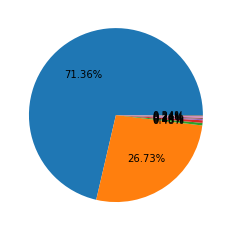

In [209]:
# pie chart of 'CompanyType' with value count
plt.pie(df['CompanyType'].value_counts(),autopct="%.2f%%")

<AxesSubplot:xlabel='CompanyType', ylabel='count'>

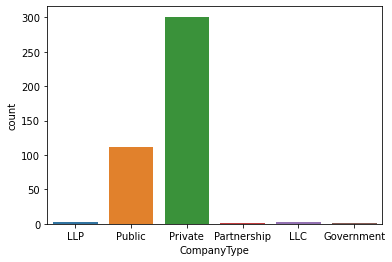

In [293]:
sns.countplot(x ='CompanyType', data = df)

<AxesSubplot:ylabel='CompanyType'>

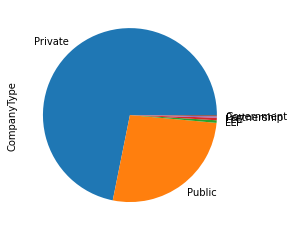

In [294]:
df['CompanyType'].value_counts().plot.pie()

<AxesSubplot:>

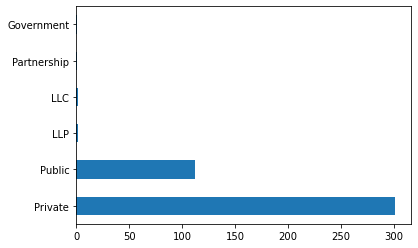

In [295]:
# barh chart of 'CompanyType' with value count

df['CompanyType'].value_counts().plot(kind = "barh")

Text(0.5, 1.0, 'comapny type')

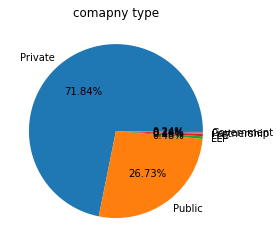

In [297]:
plt.pie(list(df['CompanyType'].value_counts().values),labels = list(df['CompanyType'].value_counts().index), autopct='%0.2f%%')
plt.title("comapny type")


[Text(0.5, 1.0, 'Rating density')]

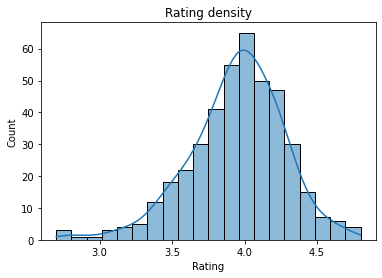

In [306]:
sns.histplot(data = df,x =  df['Rating'], kde = True).set(title='Rating density')

C:\Users\shaik sultan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Company and its Rating')]

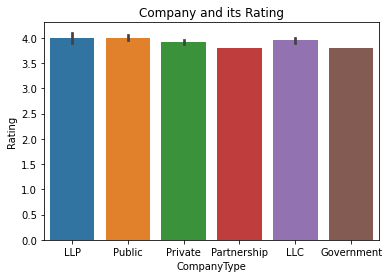

In [307]:
# using seaborn for analysis with 2 columns
sns.barplot(df['CompanyType'],df['Rating']).set(title = 'Company and its Rating')

C:\Users\shaik sultan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompanyType', ylabel='Salary'>

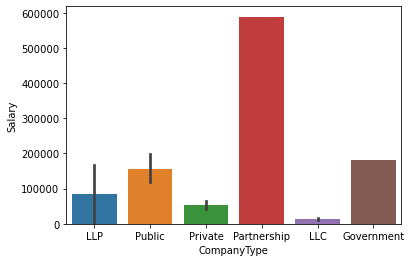

In [317]:
sns.barplot(df['CompanyType'],df['Salary'])

C:\Users\shaik sultan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompanyType', ylabel='Interviews'>

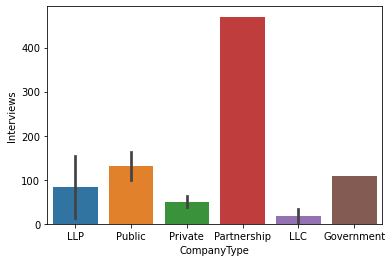

In [309]:
sns.barplot(df['CompanyType'],df['Interviews'])

C:\Users\shaik sultan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompanyType', ylabel='Jobs'>

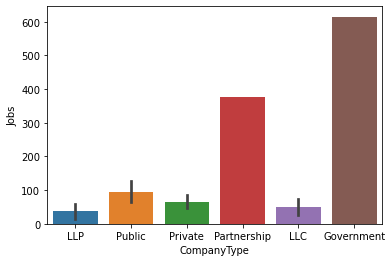

In [310]:
sns.barplot(df['CompanyType'],df['Jobs'])

C:\Users\shaik sultan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interviews', ylabel='Jobs'>

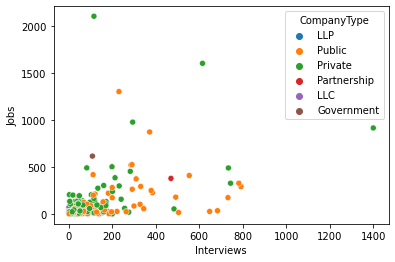

In [312]:
# seaborn graph with with hue key 
sns.scatterplot(df['Interviews'],df['Jobs'],hue=df['CompanyType'])

[Text(0.5, 1.0, 'correlation between Rating,Reviews,Salary,Interveiws,Jobs')]

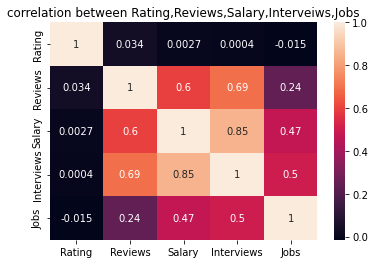

In [322]:
# showing correaltion
sns.heatmap(df.corr(),annot=True).set(title='correlation between Rating,Reviews,Salary,Interveiws,Jobs')

C:\Users\shaik sultan\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shaik sultan\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'swarmploting of Rating, Companytype and Employees')]

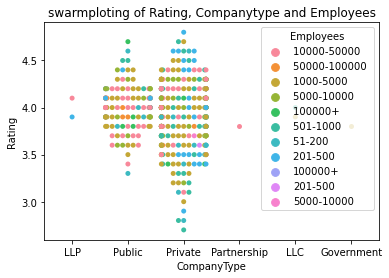

In [319]:
#swramploting 
sns.swarmplot(y=df['Rating'],x=df['CompanyType'],hue=df['Employees']).set(title='swarmploting of Rating, Companytype and Employees')


In [323]:
df[df['Rating']>4.5]

,Name,Rating,Reviews,CompanyType,HeadQuater,Age of company,Employees,Salary,Interviews,Jobs
166,EC-Council,4.6,191,Private,Petaling Jaya + 7 more,18 years old,501-1000,594,7,61
180,Indian Army,4.7,4000,Public,"New Delhi,Delhi + 267 more",128 years old,100000+,128000,80,24
189,Qentelli,4.7,136,Private,"Dallas,TX",8 years old,501-1000,802,5,61
196,Skilliantech,4.8,223,Private,"London,England + 11 more",18 years old,201-500,282,6,27
232,Sagarsoft,4.6,120,Public,"Hyderabad/Secunderabad,Telangana + 1 more",27 years old,51-200,416,3,19
310,Anion Healthcare...,4.6,108,Private,"Hyderabad/Secunderabad,Telangana + 3 more",24 years old,51-200,354,4,17
334,NxtWave,4.7,143,Private,"Hyderabad,Telangana + 5 more",3 years old,1000-5000,295,19,201
356,CMR Engineering ...,4.6,123,Private,Hyderabad + 2 more,13 years old,201-500,118,1,24
360,CMR Engineering ...,4.6,123,Private,Hyderabad + 2 more,13 years old,201-500,118,1,24
390,CMR Engineering ...,4.6,123,Private,Hyderabad + 2 more,13 years old,201-500,118,1,24


In [325]:
df[(df['Salary']>100000)&(df['Reviews']>=50000)]

,Name,Rating,Reviews,CompanyType,HeadQuater,Age of company,Employees,Salary,Interviews,Jobs
5,Axis Bank,3.9,185000,Public,"Mumbai,Maharashtra + 1091 more",30 years old,50000-100000,1239000,792,291
25,Teleperformance,3.6,143000,Private,Paris + 122 more,45 years old,50000-100000,679000,744,327
28,Kotak Mahindra B...,3.9,133000,Public,"Mumbai,Maharashtra + 471 more",20 years old,10000-50000,783000,492,179
30,Concentrix Corpo...,4.0,149000,Public,"Fremont,California + 70 more",40 years old,10000-50000,853000,684,35
33,Vodafone Idea,4.2,131000,Public,"Gandhinagar,Gujrat + 563 more",5 years old,10000-50000,695000,310,373
42,Reliance jio,4.0,145000,Public,"Navi Mumbai,Maharashtra + 984 more",16 years old,50000-100000,819000,782,327
50,BYJU'S,3.5,127000,Private,"Bangalore,Karnataka + 251 more",12 years old,1000-5000,496000,1400,914
51,Shapoorji Pallon...,4.3,65000,Private,"Mumbai,Maharashtra + 133 more",158 years old,5000-10000,153000,159,21
53,Apollo Hospitals,4.1,53000,Public,"San Francisco,California + 159 more",40 years old,50000-100000,154000,134,93
58,Infosys BPM,4.0,58000,Private,"Bangalore/Bengaluru,Karnataka + 49 more",21 years old,10000-50000,459000,484,54


In [326]:
df[df['Name']=='Indian Army']

,Name,Rating,Reviews,CompanyType,HeadQuater,Age of company,Employees,Salary,Interviews,Jobs
180,Indian Army,4.7,4000,Public,"New Delhi,Delhi + 267 more",128 years old,100000+,128000,80,24


In [327]:
df[df['Name']=='Reliance Retail']

,Name,Rating,Reviews,CompanyType,HeadQuater,Age of company,Employees,Salary,Interviews,Jobs
65,Reliance Retail,4.1,162000,Private,"Navi Mumbai,Maharashtra + 689 more",17 years old,10000-50000,535000,734,489
